In [42]:
from disp_agp_solver import Instance, DispAgpSolver, DispAgpSolverObserver
from typing import List, Tuple, Any
from pyvispoly import plot_polygon, Point, Polygon
import matplotlib.pyplot as plt
import os
import typing

In [43]:
from disp_agp_solver.sgdb import fetch
instance = fetch("https://sbgdb.cs.sbg.ac.at/db/wip/polygons-with-holes/random/srpg_iso_mc/srpg_iso_mc0000311.graphml.xz")

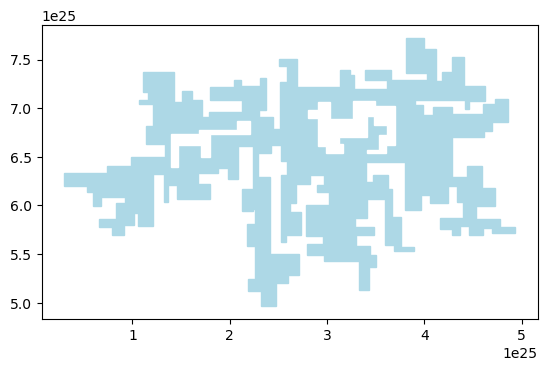

In [44]:
from pyvispoly import plot_polygon
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_aspect("equal")
plot_polygon(instance.as_cgal_polygon(), color="lightblue", ax=ax)
plt.show()

In [45]:
def plot_solution(ax, instance, objective, guards, witnesses, closest_pair, title=""):
    ax.set_aspect("equal")
    plt.title(title+"Objective: " + str(objective))
    plot_polygon(instance.as_cgal_polygon(), color="lightblue", ax=ax)
    for witness, covering_guards in witnesses:
        ax.plot([float(witness.x())], [float(witness.y())], "x", color="grey")
    for guard in guards:
        if guard not in closest_pair:
            ax.plot(
                [instance.positions[guard][0]],
                [instance.positions[guard][1]],
                "bo",
            )
        else:
            ax.plot(
                [instance.positions[guard][0]],
                [instance.positions[guard][1]],
                "ro",
            )

In [46]:
# Plotting the solution process
class MyObserbver(DispAgpSolverObserver):
    def __init__(
        self, instance, save_to: typing.Optional[str] = None, filetype="pdf"
    ) -> None:
        super().__init__()
        self.instance = instance
        if save_to is not None:
            os.makedirs(save_to, exist_ok=True)
        self._save_to = save_to
        self.filetype = filetype
        self.i = 0
        self.last_solution = None

    def _save(self, name):
        if self._save_to is not None:
            # up to 3 digits
            plt.savefig(
                os.path.join(self._save_to, f"{self.i:03d}_{name}.{self.filetype}")
            )
        self.i += 1

    def on_coverage_iteration(
        self,
        guards: List[int],
        witnesses: List[Tuple[Any, List[int]]],
        missing_areas: List,
    ):
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        plt.title("Adding " + str(len(witnesses)) + " witnesses")
        plot_polygon(self.instance.as_cgal_polygon(), color="lightblue", ax=ax)
        for area in missing_areas:
            print(area)
            plot_polygon(area, color="red", ax=ax, alpha=0.3)
        for guard in guards:
            ax.plot(
                [self.instance.positions[guard][0]],
                [self.instance.positions[guard][1]],
                "bo",
            )
        for witness, covering_guards in witnesses:
            print("New witness", witness, "covers guards:", covering_guards)
            for covering_guard in covering_guards:
                ax.plot(
                    [self.instance.positions[covering_guard][0], float(witness.x())],
                    [self.instance.positions[covering_guard][1], float(witness.y())],
                    "r--",
                    lw=0.5,
                )
            ax.plot([float(witness.x())], [float(witness.y())], "x", color="darkred")
        self._save("coverage_iteration")
        plt.show()

    def on_new_solution(
        self,
        guards: List[int],
        objective: float,
        closest_pair: Tuple[int, int],
        witnesses: List[Tuple[Any, List[int]]],
    ):
        self.last_solution = (objective, guards, witnesses, closest_pair)
        fig, ax = plt.subplots()
        plot_solution(ax, self.instance, objective, guards, witnesses, closest_pair)
        self._save("new_solution")
        plt.show()

    def plot_last_solution(self, show=True):
        if self.last_solution is not None:
            fig, ax = plt.subplots()
            plot_solution(ax, self.instance, *self.last_solution, title="OPTIMAL - ")
            self._save("last_solution")
            if show:
                plt.show()

New witness (3.7468e+25, 5.5516e+25) covers guards: [232, 234, 235, 236, 237, 238, 239, 240]
New witness (3.8725999999999995e+25, 5.5516e+25) covers guards: [235, 236, 237, 238]
New witness (4.4396e+25, 7.0952e+25) covers guards: [35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 55, 56, 60, 61, 62, 68, 303, 304]
New witness (4.4396e+25, 7.009100000000001e+25) covers guards: [36, 37, 38, 39, 42]
New witness (1.3429e+25, 6.231499999999999e+25) covers guards: [100, 101, 112, 113, 142, 143, 144, 145, 146, 150, 151, 157, 273, 274, 275, 277, 278, 279, 281]
New witness (1.3429e+25, 6.054399999999999e+25) covers guards: [101, 112, 113, 142, 143, 144, 145, 273]
New witness (1.1797999999999998e+25, 7.063299999999999e+25) covers guards: [94, 100, 101, 104, 105, 106, 107, 108, 270, 271, 272]
New witness (1.0849e+25, 7.063299999999999e+25) covers guards: [100, 105, 106, 107, 108]
New witness (2.55205e+25, 5.64695e+25) covers guards: [68, 69, 189, 190, 191, 192, 193, 196, 197]
New witness (2.5520

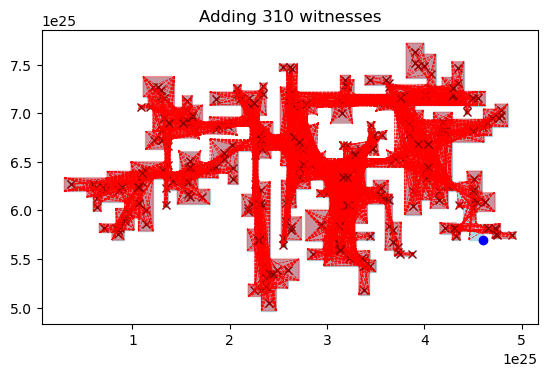

New witness (9.28669677232991e+24, 6.058107762765641e+25) covers guards: [113, 115, 126, 127, 135, 136, 137, 138, 140, 141]
New witness (1.033726139251822e+25, 5.927048847489625e+25) covers guards: [114, 115, 116, 126, 127, 128, 137, 138, 141]
New witness (6.65463433582646e+24, 6.002836566417354e+25) covers guards: [122, 123, 124, 125]
New witness (1.0966883879049403e+25, 5.82328838790494e+25) covers guards: [114, 115, 138, 139, 140, 141]
New witness (1.5069827634385678e+25, 6.112282763438568e+25) covers guards: [113, 146, 147, 148, 149, 150, 151, 274, 275, 276, 277, 278]
New witness (1.7761842407040321e+25, 6.203084240704031e+25) covers guards: [146, 147, 148, 149, 150]
New witness (1.4810367776857797e+25, 6.60956322231422e+25) covers guards: [147, 150, 151, 152, 153, 275, 276, 277, 278]
New witness (1.6878217572568548e+25, 6.525445133305746e+25) covers guards: [145, 146, 147, 151, 275, 276, 277, 278]
New witness (1.6563844598886548e+25, 6.573284459888655e+25) covers guards: [145, 146

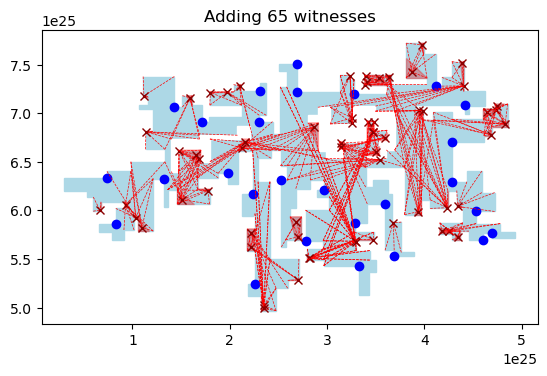

New witness (1.0702965197433953e+25, 5.796896519743396e+25) covers guards: [138, 139, 140, 141]
New witness (1.474076789167576e+25, 6.60498951184723e+25) covers guards: [150, 151, 152, 153, 275, 276, 277, 278]
New witness (1.474258256355079e+25, 6.616341743644922e+25) covers guards: [150, 151, 152, 153, 275, 276, 277, 278]
New witness (2.1388065148794224e+25, 6.72928631957393e+25) covers guards: [145, 146, 151, 153, 157, 158, 184, 185, 186, 279, 280, 281, 283, 313]
New witness (2.33500955894464e+25, 4.97870955894464e+25) covers guards: [158, 172, 173, 174, 175, 180, 181, 182]
New witness (3.6109299444641304e+25, 6.73187005553587e+25) covers guards: [291, 292, 293, 294]
New witness (4.735066858566959e+25, 7.085633141433041e+25) covers guards: [21, 22, 23, 24, 25]
New witness (4.354805717175154e+25, 5.710694282824846e+25) covers guards: [260, 262, 263, 264, 265]
New witness (4.337122352623328e+25, 6.036522352623328e+25) covers guards: [11, 12, 13, 15, 256, 257, 258]


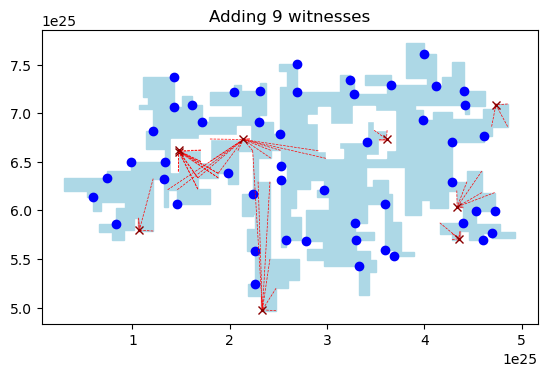

New witness (2.3296879933161177e+25, 4.973387993316118e+25) covers guards: [172, 173, 174, 175, 180, 181, 182]
New witness (4.731005511081994e+25, 7.089694488918006e+25) covers guards: [22, 23, 24, 25]
New witness (4.345065743640094e+25, 5.703563543522502e+25) covers guards: [262, 263, 264, 265]


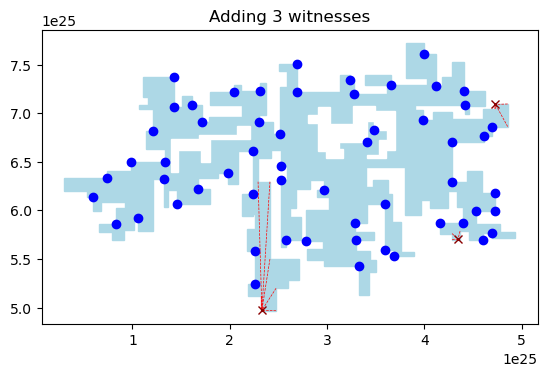

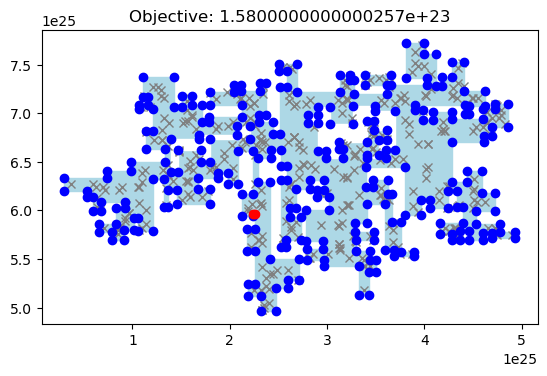

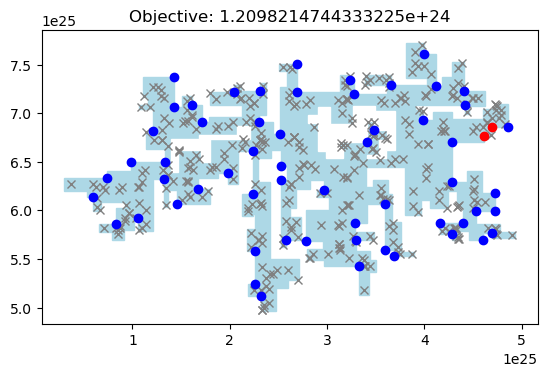

New witness (3.136751192083563e+25, 6.640151192083564e+25) covers guards: [285, 286, 287, 288, 294, 295, 296]


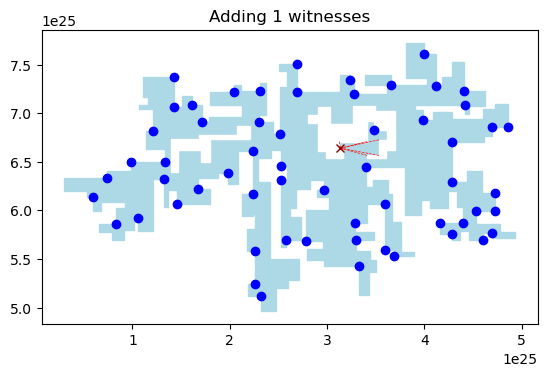

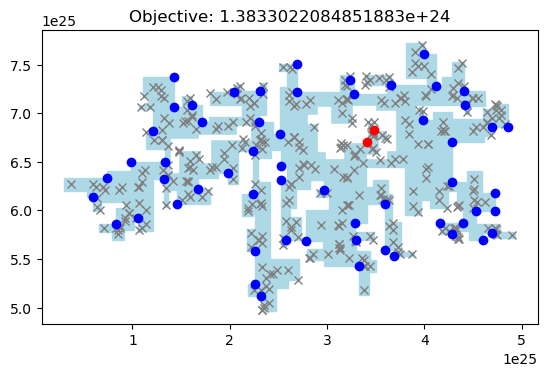

New witness (2.704439589691766e+25, 5.340303464589251e+25) covers guards: [169, 171, 177, 178, 179, 180]


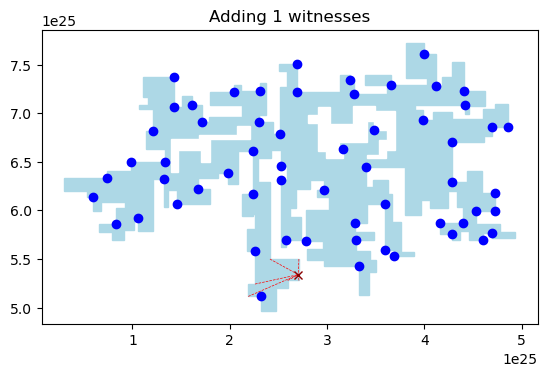

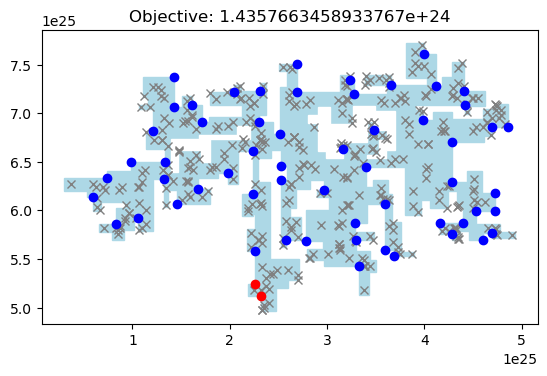

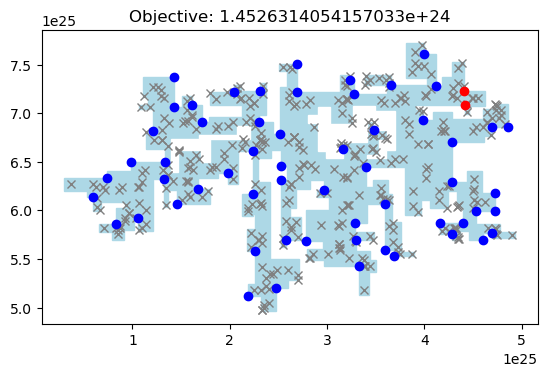

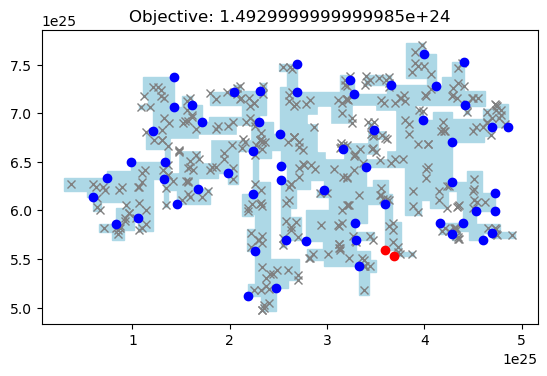

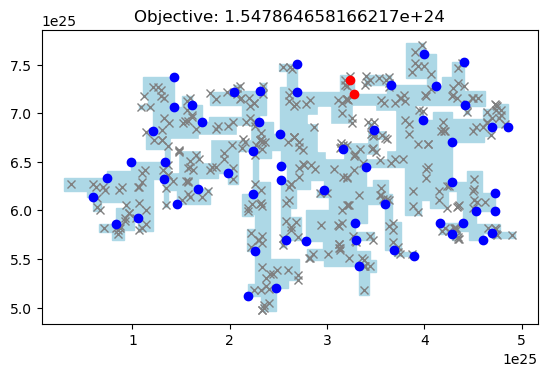

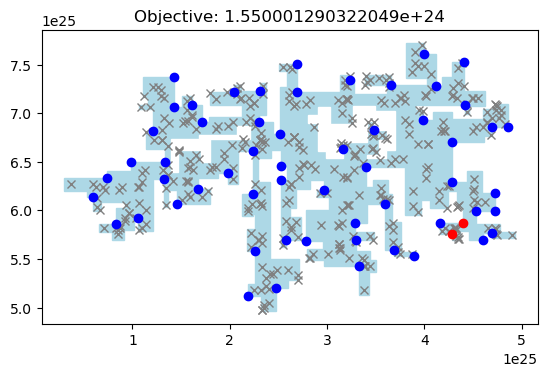

New witness (4.561e+25, 6.3749e+25) covers guards: [9, 12, 13, 14, 15, 256, 257, 258, 259, 265, 266, 267]
New witness (4.561e+25, 6.324700000000001e+25) covers guards: [9, 12, 13, 14, 15, 251, 255, 256, 257, 258, 259, 265, 266, 267]
New witness (4.71250763171095e+25, 5.7324076317109494e+25) covers guards: [2, 3, 4, 5, 6, 7]
New witness (4.923765376692511e+25, 5.767265376692512e+25) covers guards: [1, 2, 3, 4, 5, 6, 266]


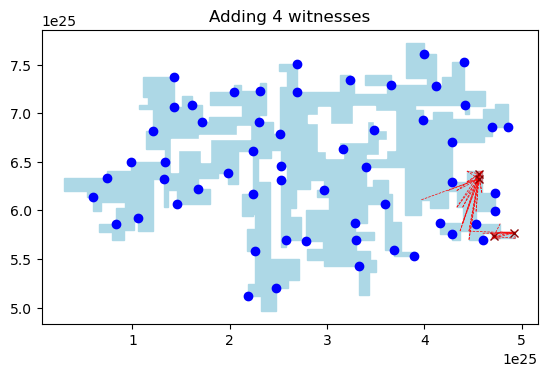

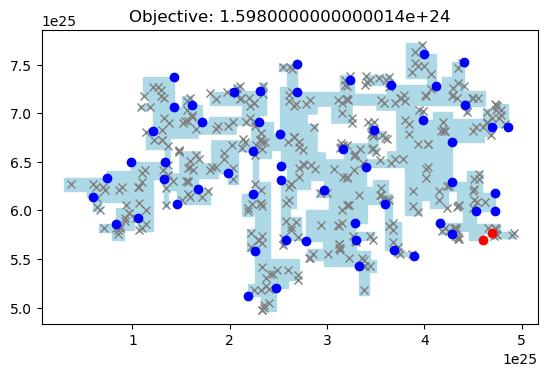

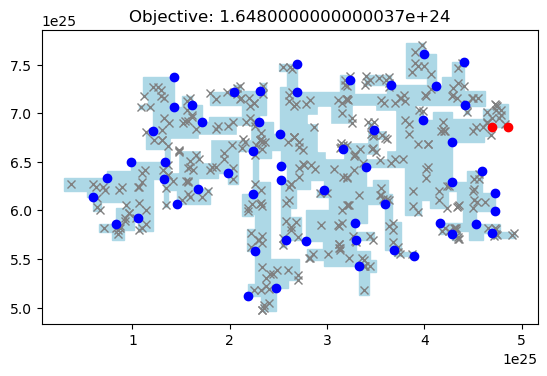

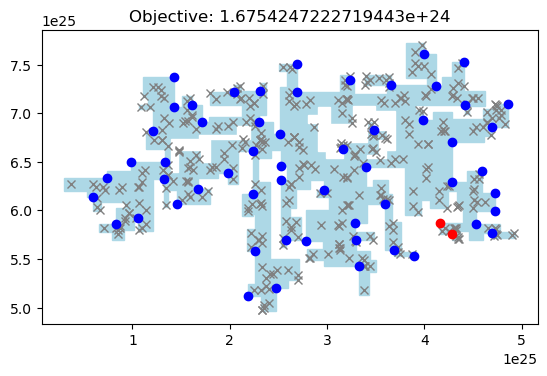

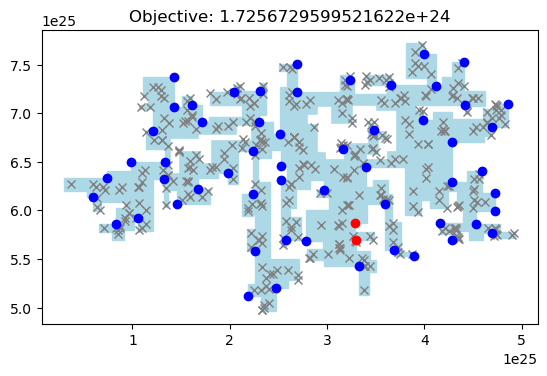

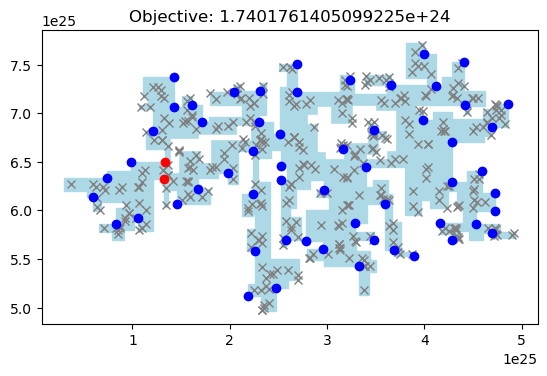

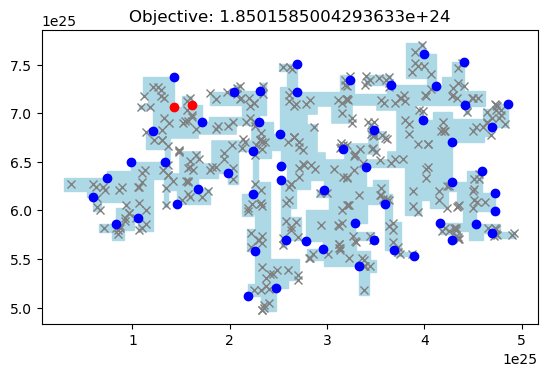

New witness (4.518586226247739e+25, 5.8762402394430005e+25) covers guards: [0, 1, 8, 9, 14, 15, 256, 258, 259, 261, 262, 265, 266, 267]
New witness (4.518590400094433e+25, 5.8762438586613335e+25) covers guards: [0, 1, 8, 9, 14, 15, 256, 258, 259, 261, 262, 265, 266, 267]
New witness (4.589122274313492e+25, 5.7394443144937364e+25) covers guards: [0, 1, 8, 256, 258, 259, 266, 267]
New witness (4.572736796045171e+25, 5.727063203954829e+25) covers guards: [0, 1, 8, 256, 258, 259, 266, 267]
New witness (4.527954495202522e+25, 5.733e+25) covers guards: [0, 1, 7, 8, 9, 14, 15, 256, 258, 259, 266, 267]
New witness (4.530088022954366e+25, 5.733e+25) covers guards: [0, 1, 7, 8, 9, 14, 15, 256, 258, 259, 266, 267]
New witness (4.599604029627989e+25, 5.747364484357895e+25) covers guards: [0, 1, 8, 258, 259, 266, 267]


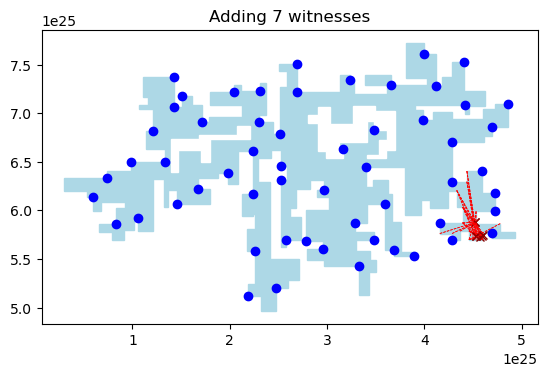

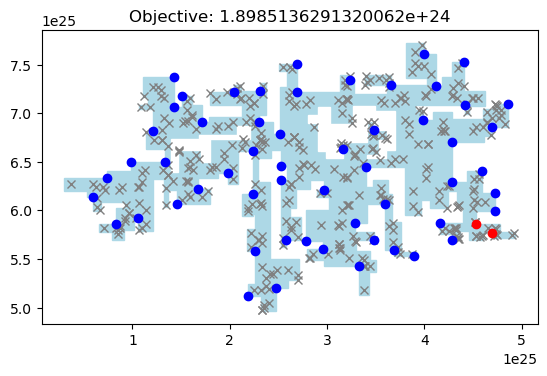

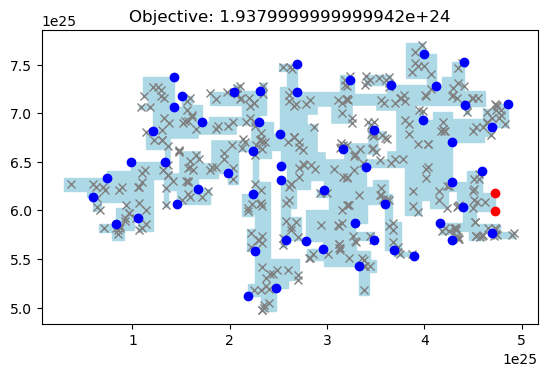

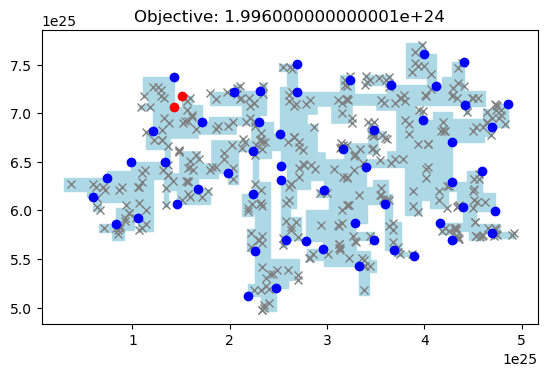

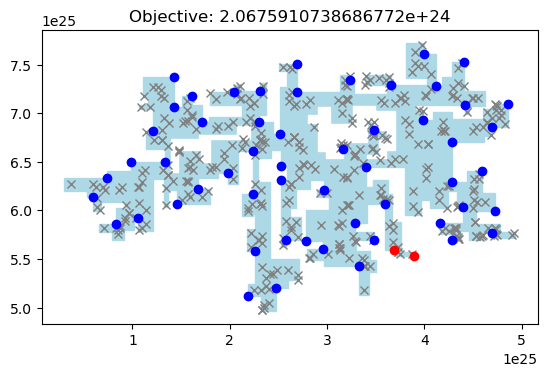

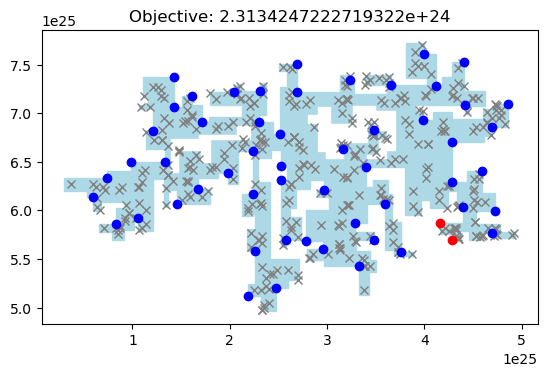

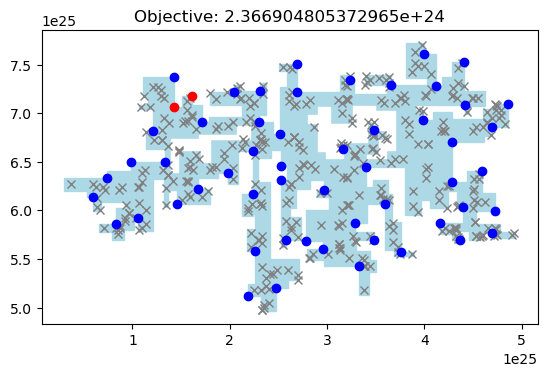

New witness (9.769351353120881e+24, 5.805664864687912e+25) covers guards: [115, 126, 127, 128, 129, 130, 131, 135, 136, 137]
New witness (8.304133376710624e+24, 5.921986662328937e+25) covers guards: [127, 128, 129, 134, 135, 136, 137, 141]


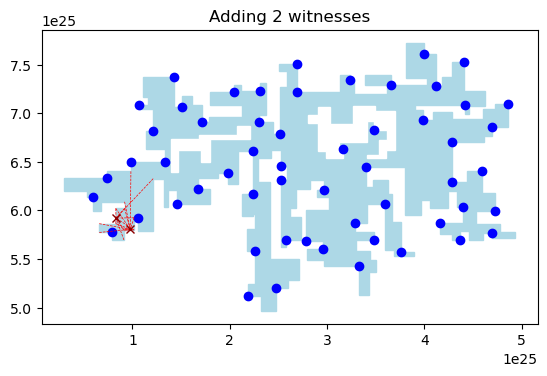

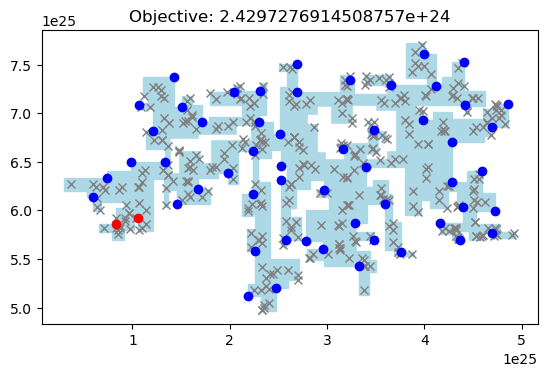

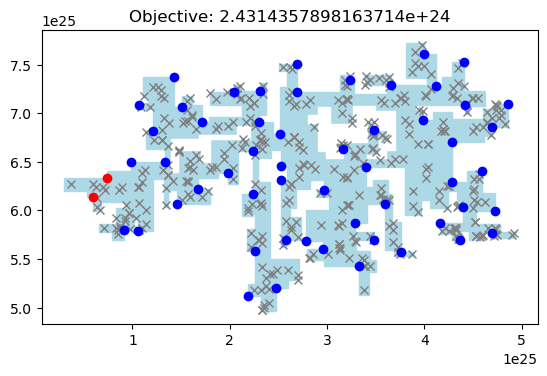

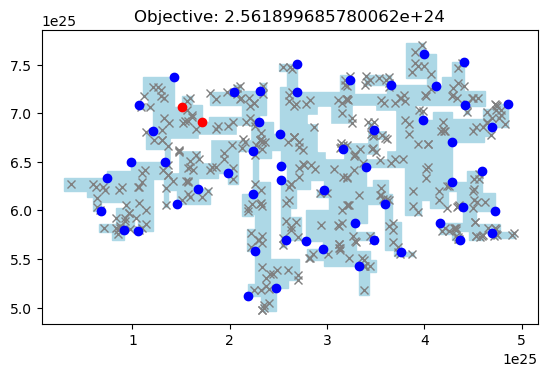

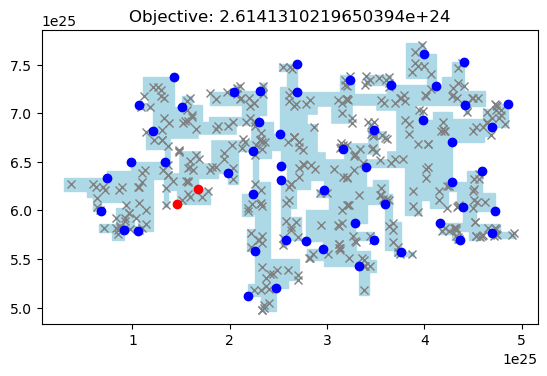

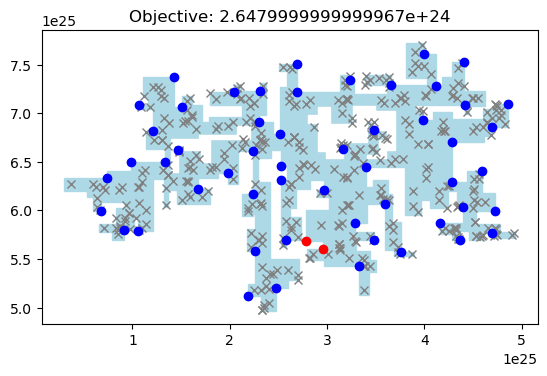

New witness (2.0336986992695656e+25, 6.957300814275794e+25) covers guards: [76, 78, 91, 92, 93, 246, 268, 269, 270, 271, 273, 283]
New witness (1.8122391731886002e+25, 6.9384608268114e+25) covers guards: [78, 91, 92, 93, 268, 269, 270, 271]


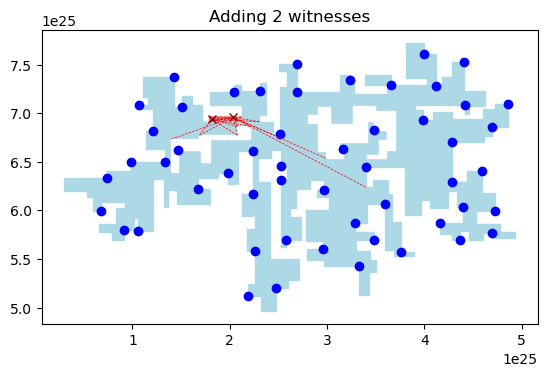

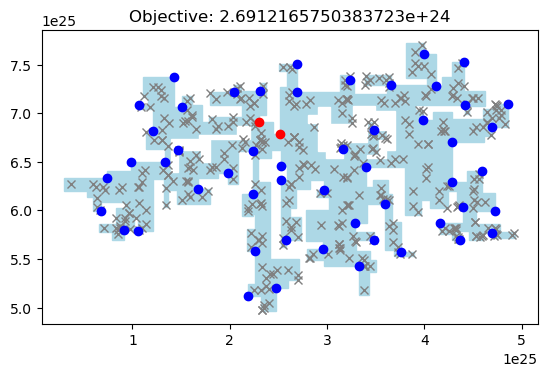

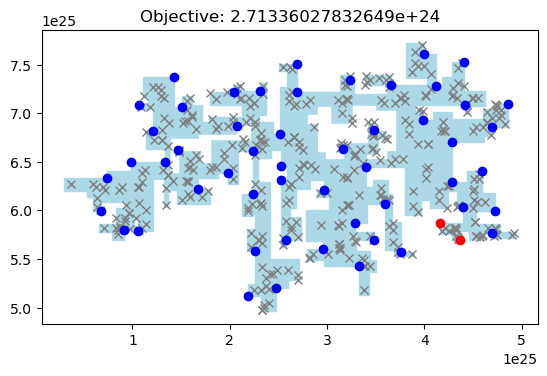

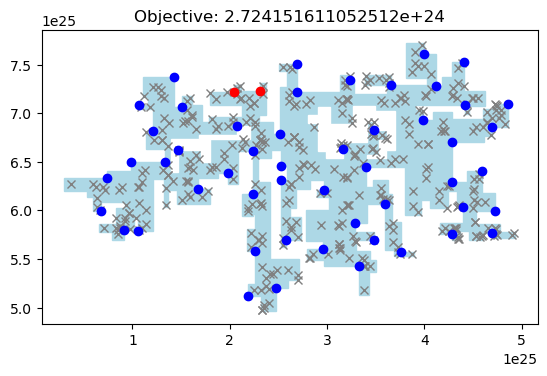

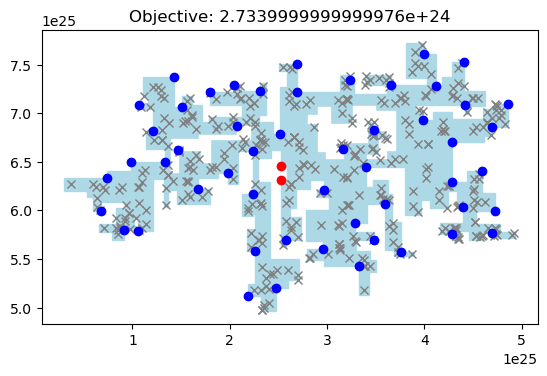

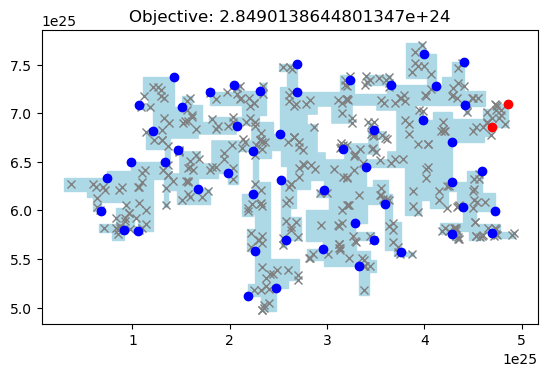

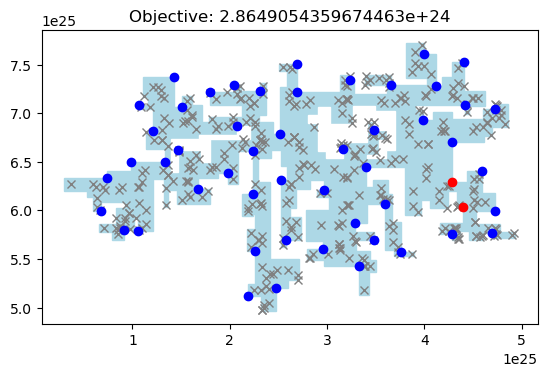

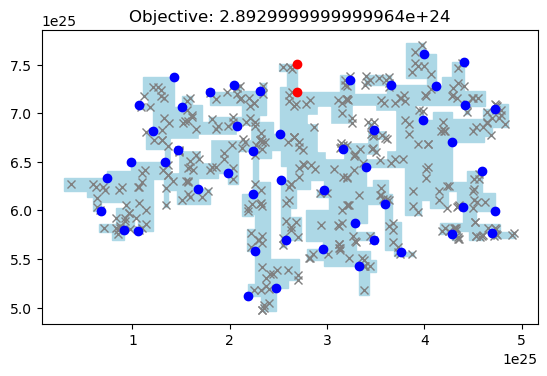

New witness (2.124963379851952e+25, 6.978942271506613e+25) covers guards: [76, 78, 79, 80, 81, 83, 90, 91, 185, 186, 202, 231, 268]
New witness (2.133247101764279e+25, 7.019025054771885e+25) covers guards: [76, 78, 79, 80, 83, 84, 90, 91, 184, 185, 186, 201, 202, 268]
New witness (2.157795770136145e+25, 7.22445e+25) covers guards: [78, 79, 80, 83, 84, 87, 89, 90, 91, 174, 182, 183, 184, 185, 268]
New witness (2.1318809997584638e+25, 7.22445e+25) covers guards: [78, 79, 80, 83, 84, 87, 89, 90, 91, 183, 184, 185, 268]
New witness (2.311994686530169e+25, 7.30680531346983e+25) covers guards: [80, 81, 82, 83]
New witness (2.314717742785232e+25, 7.306551732588397e+25) covers guards: [79, 80, 81, 82, 83, 164, 165]


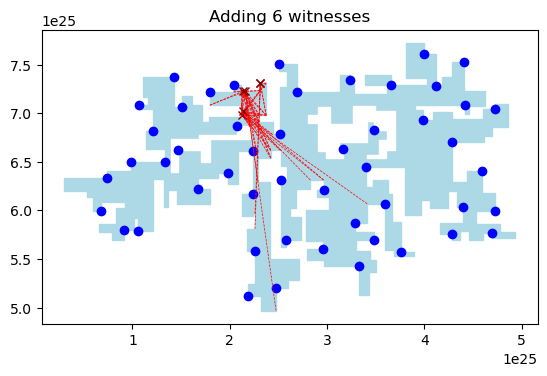

New witness (2.122200031043694e+25, 6.9773999689563065e+25) covers guards: [76, 78, 79, 81, 83, 90, 91, 185, 186, 202, 231, 268]
New witness (2.125768254333498e+25, 6.976388051052901e+25) covers guards: [76, 78, 79, 81, 83, 90, 91, 185, 186, 202, 231, 268]


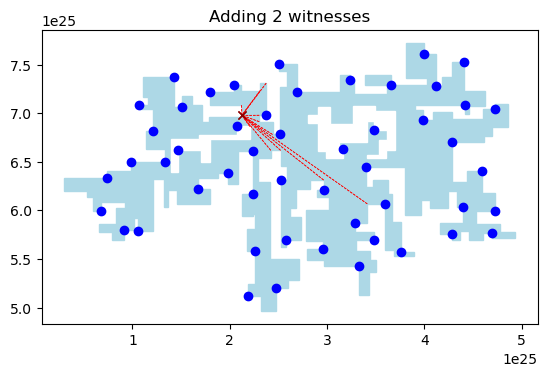

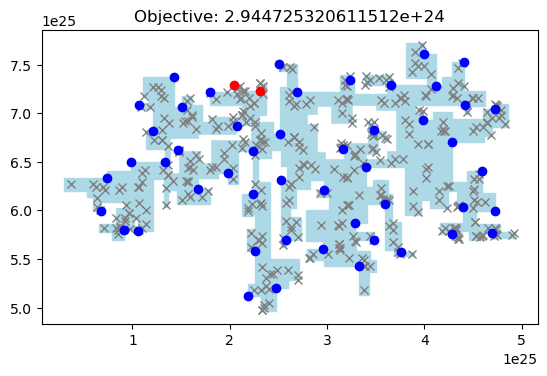

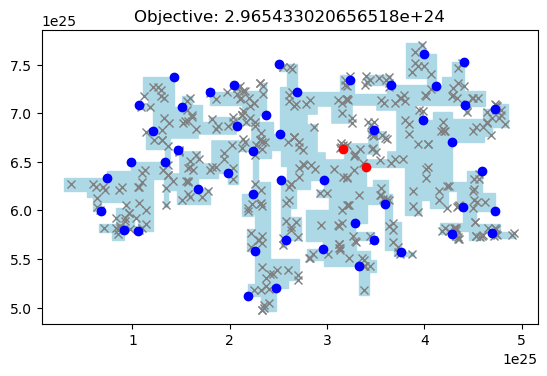

New witness (2.130568505133317e+25, 5.945268505133317e+25) covers guards: [159, 160, 161, 162, 163, 181]
New witness (2.1675460287138557e+25, 6.122953971286144e+25) covers guards: [159, 160, 161, 162, 163, 164]
New witness (2.327523730400556e+25, 4.971223730400556e+25) covers guards: [172, 173, 174, 175, 180, 181]


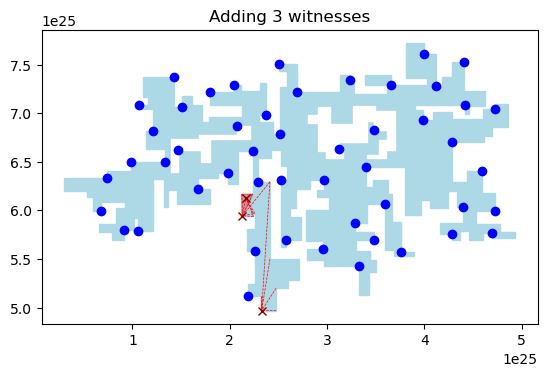

New witness (2.204051600143732e+25, 5.228748399856269e+25) covers guards: [169, 170, 171, 172, 175, 176, 177]


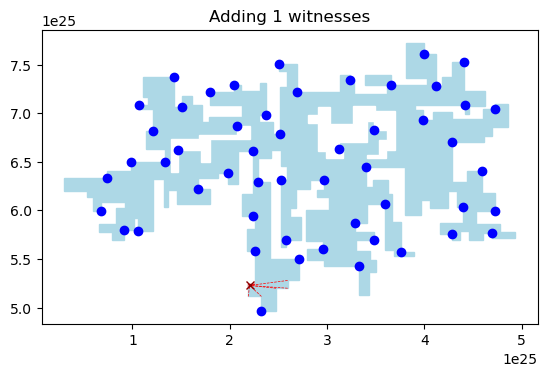

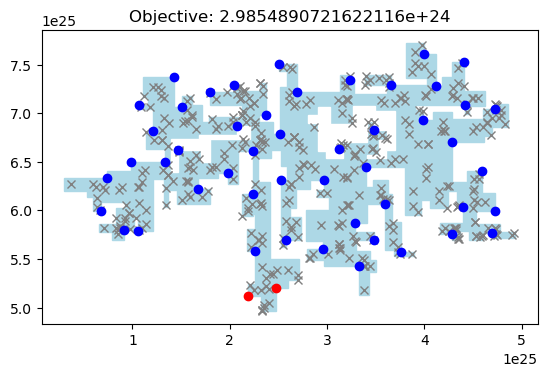

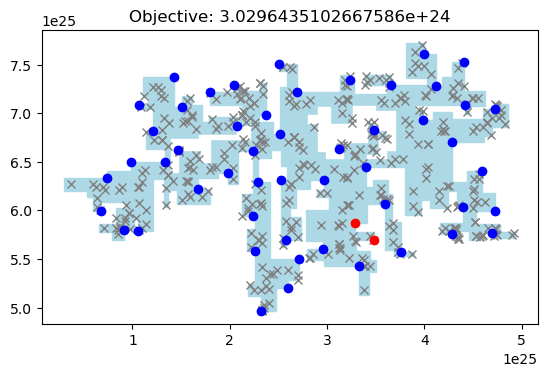

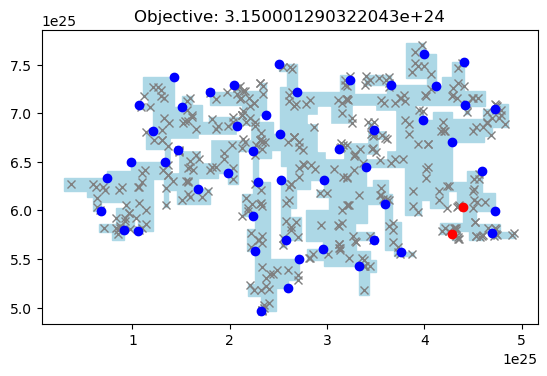

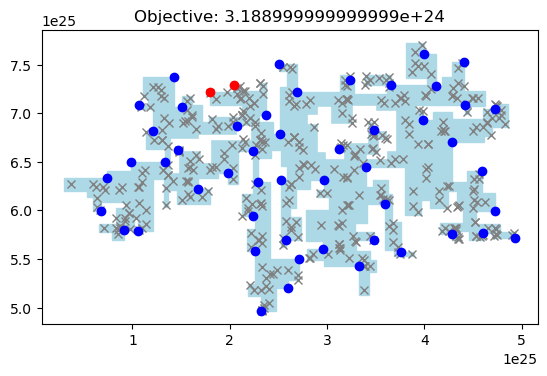

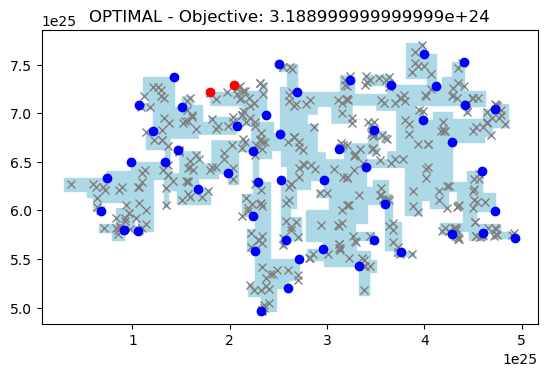

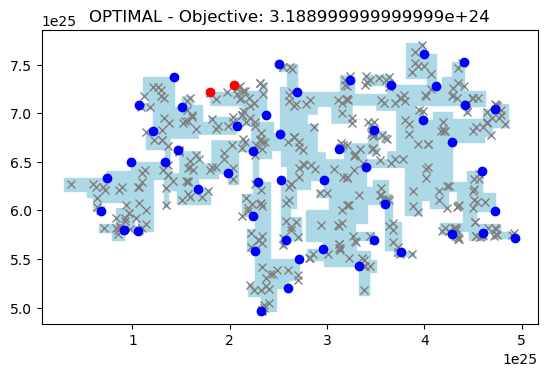

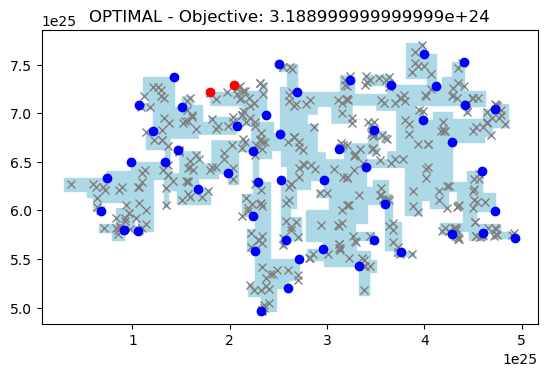

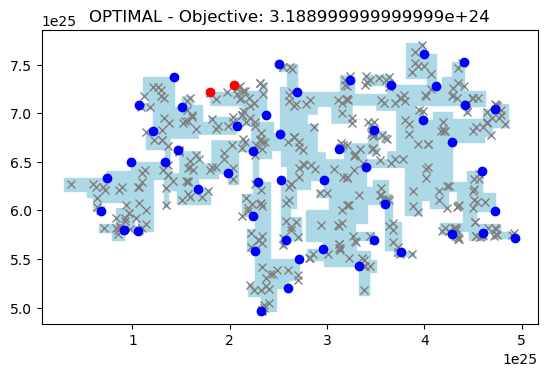

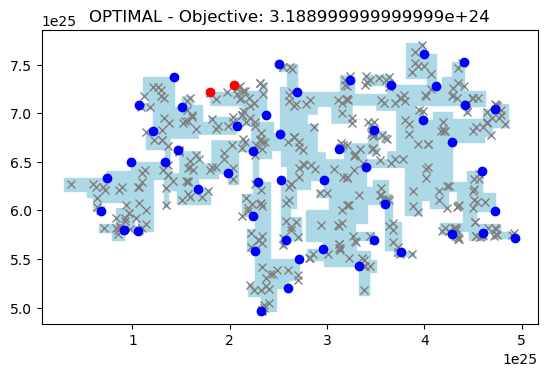

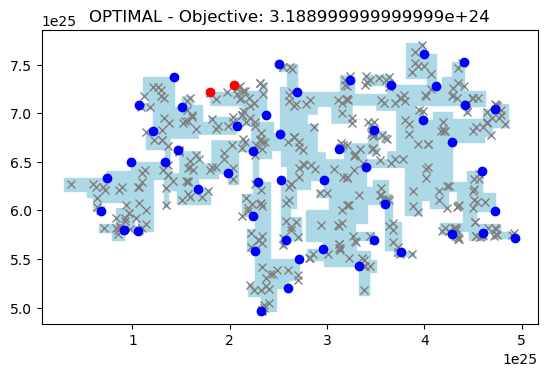

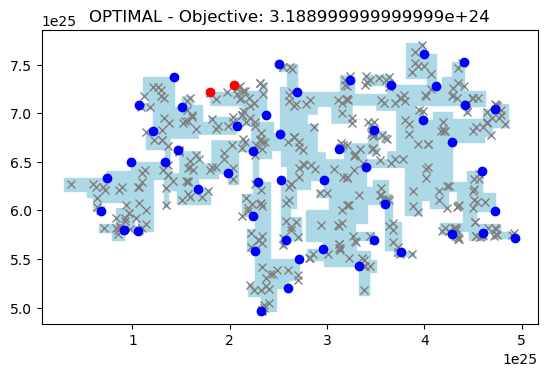

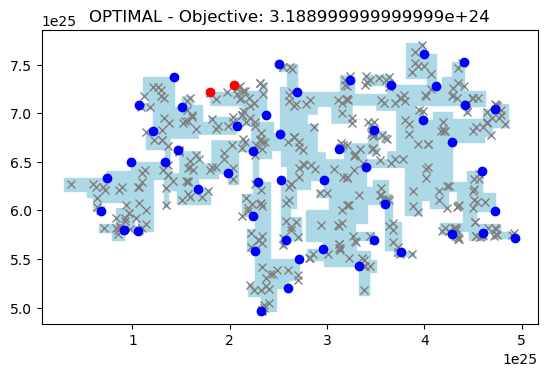

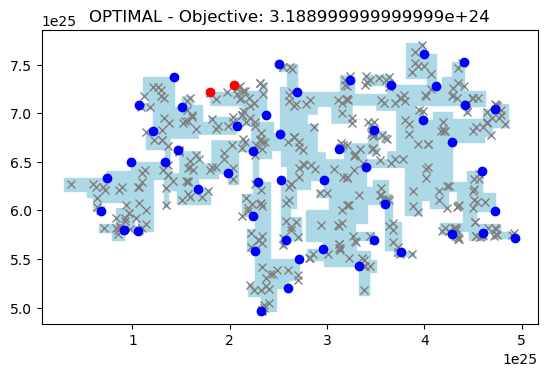

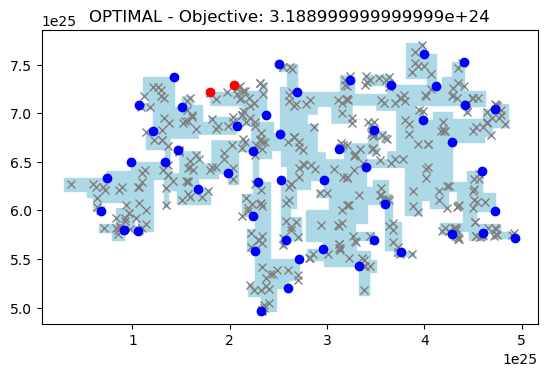

Guards [1, 4, 10, 13, 17, 25, 32, 36, 43, 48, 50, 56, 64, 68, 70, 75, 80, 86, 89, 99, 101, 106, 109, 113, 114, 117, 124, 135, 139, 150, 154, 158, 162, 168, 173, 176, 179, 182, 190, 193, 202, 211, 216, 226, 232, 238, 247, 262, 269, 276, 286, 291] Distance 3.204688793659442e+24


In [47]:
solver = DispAgpSolver(instance)
solver.observer = MyObserbver(instance, "example_iterations", "png")
solver.optimize()


print("Guards", solver.guards, "Distance", solver.objective)

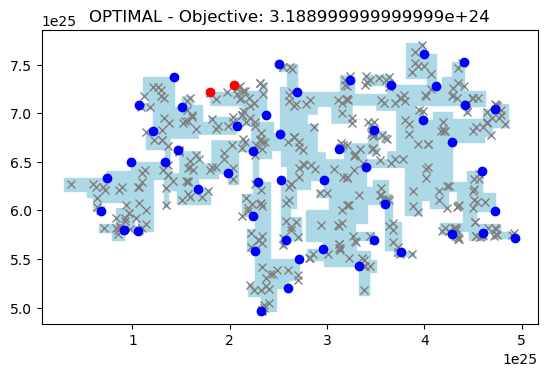

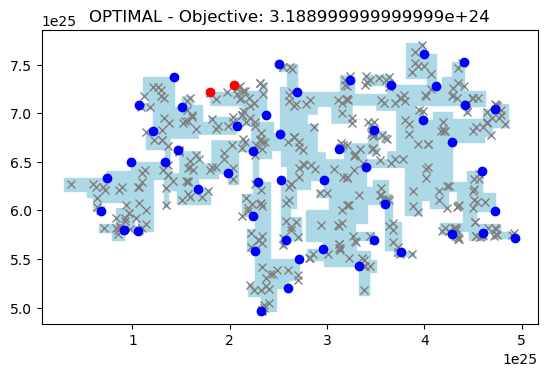

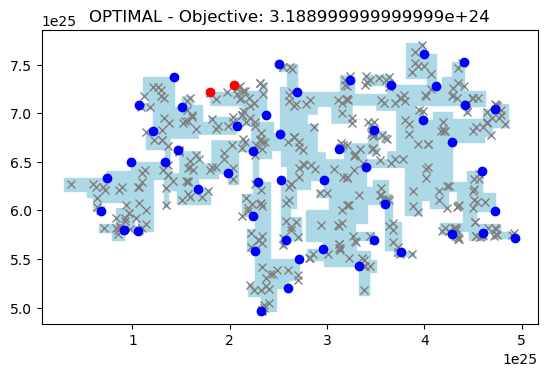

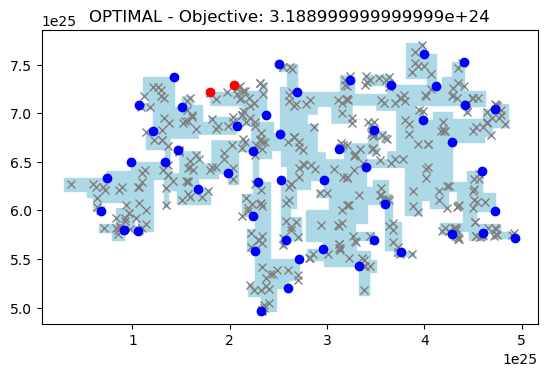

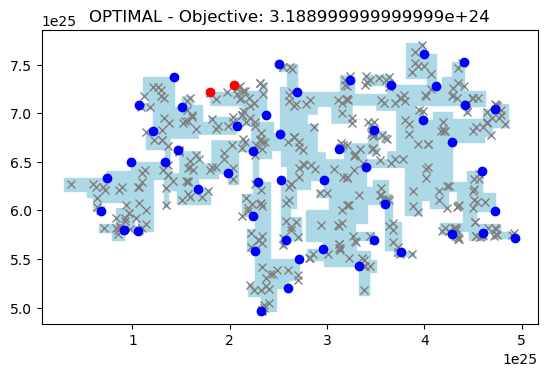

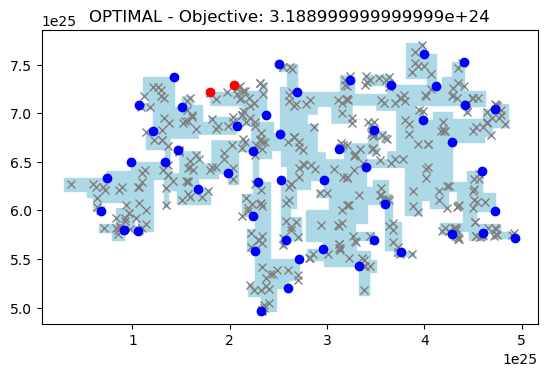

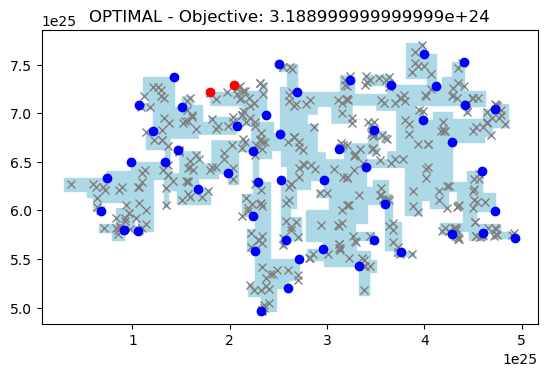

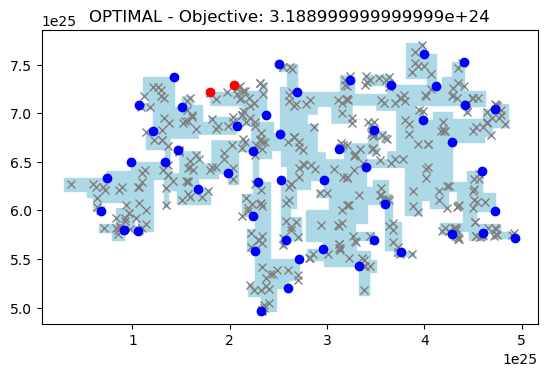

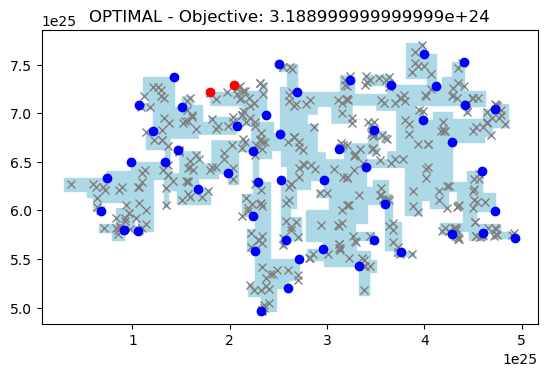

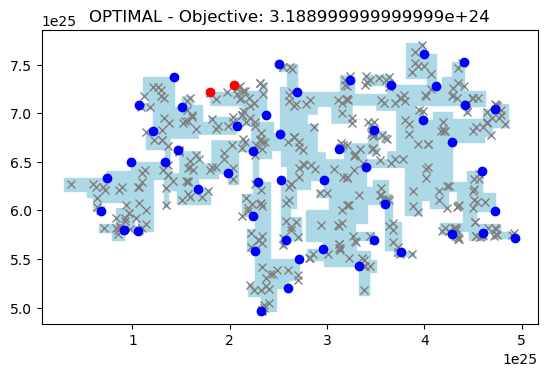

In [49]:
for i in range(10):
    solver.observer.plot_last_solution()